## In this tutorial we will scrape 112 speech of Barak Obama in 2019
## and generate a word cloud with most frequent word appears in his speech
## The transcript will be scrapped from http://obamaspeeches.com/

In [1]:
from bs4 import BeautifulSoup
# Beautful soup is an amazing library to get contents from different html tag
# it rearranges the messy html script that we will scrape with "requests" library

import requests as re
# using this library we will download the html script from the given webpage

from wordcloud import WordCloud, STOPWORDS 
# stopwords are the words that are frequently used in engligh languages but not contains that much meaning - 
# interms of NLP analysis (e:g the, to, for etc)

import matplotlib.pyplot as plt 
import pandas as pd 
# we know why we need matplotlib and pandas :D


In [2]:
html_content = re.get("http://obamaspeeches.com/").content
# we donwnloaded the html content of this webpage
# you can print(html_content) to see what we have downlaoded

soup = BeautifulSoup(html_content)
# converting html_content to a soup object will make the html_codes looks more tidyer
# you can print before and after converting html_content to a soup object
# and of course now we can apply all the cool function of beautiful awaiting for us

link = soup.findAll('td')
# we are basically searching for all the contents that are inside <td> </td> html tag,
# and storing them in a variable

# Why we are selecting td contents???????????
# - go to obamasppech.com and cntrl +U for seeing the source code
# - we can see all the links for each individual speech trancscrip is in <td> </td> tag

a = link[1].findAll('a')
# searching for all the href(https links) inside td and storing them in a varialbe

all_link = []

for i in range(len(a)):
    all_link.append("http://obamaspeeches.com/"+a[i]["href"])
    # appending all the links to a list so that we can use them for accessing each individual transcript

### Getting contents from td or a tag is depended on what content we are trying to access
#### for this we need to see the source code for the webpage(ctrl + U) and inspect the elements
#### inspecting elements means clicking the webpage and it will show the responsible html codes

https://www.loom.com/share/0347c0fe31aa4a91a1e5daaf4ddda1c3



In [3]:
df = pd.DataFrame(columns = ["speech", "link"])
# creating an empty dataframe where we will store the transcirpt of each script


#now we will go iteretively to each link we collected (where all the trascript are located)
for j in range(len(all_link)):
    new_soup = BeautifulSoup(re.get(all_link[j]).content)
    # the same getting the html content of each transcript
    p = new_soup.findAll('font', {"size":"3"})
    # this is interesting
    # we collected all the paragraph (p) content where font size is 3
    # to select some content in html is arbritray, you can select the filter based on the inspection
    speech = []

    for i in range(len(p)):
        speech.append(p[i].text)
        # appending all the paragraph to a single speech varialbe

    speech = "".join(speech)
    # convering to a sting type
    transcript = " ".join(speech.split())
    df = df.append({'speech': transcript, 'link':all_link[j]}, ignore_index=True)
    

In [4]:
#saving dataframe as csv, we also can do things directly
#but making sure we have a local copy of data
df.to_csv("obama.csv")

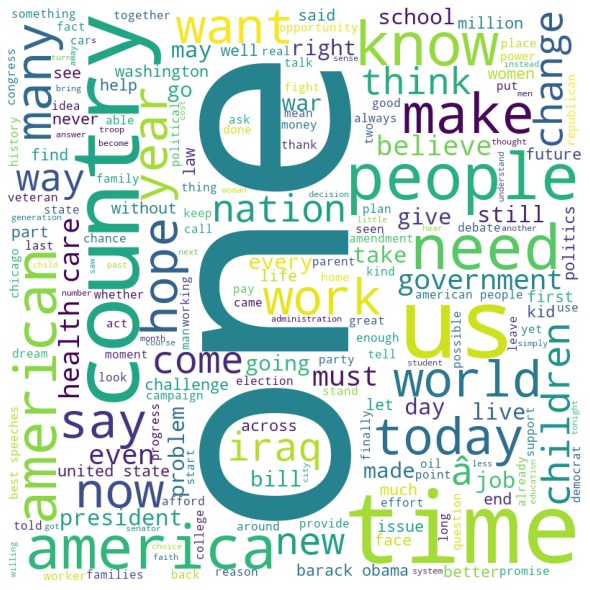

In [5]:

df = pd.read_csv(r"obama.csv", encoding ="latin-1") 
  
comment_words = '' 

stopwords = set(STOPWORDS) 
stopwords.add("will")
stopwords.add("u")


  
# iterate through the csv file 
for val in df.speech: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value to generate token
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# Thank you 